# Predict Customer Churn
In this project we will be building a model that Predicts customer churn with Machine Learning. Prediction of Customer Churn means our beloved customers with the intention of leaving us in the future.

[Source link](https://thecleverprogrammer.com/2020/05/26/predict-customer-churn-with-python-and-machine-learning/#google_vignette)

## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
pd.read_csv("data/churn.csv").head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [15]:
df = pd.read_csv("data/churn.csv")
df.drop(columns=["customerID"], inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Information of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### Converting the "TotalCharges" column to float

In [16]:
# df["TotalCharges"].astype("float")
# ValueError: could not convert string to float: ' '
n = (df["TotalCharges"] == " ").sum()
print(f"Percent of missing values in 'TotalCharges' column: {(n / len(df)) * 100:.2f}%")
print("Since the percentage is very low, we can drop them easily.")
df = df[df["TotalCharges"] != " "]
df["TotalCharges"] = df["TotalCharges"].astype("float")
df.info()

Percent of missing values in 'TotalCharges' column: 0.16%
Since the percentage is very low, we can drop them easily.
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 n

## Data visualization

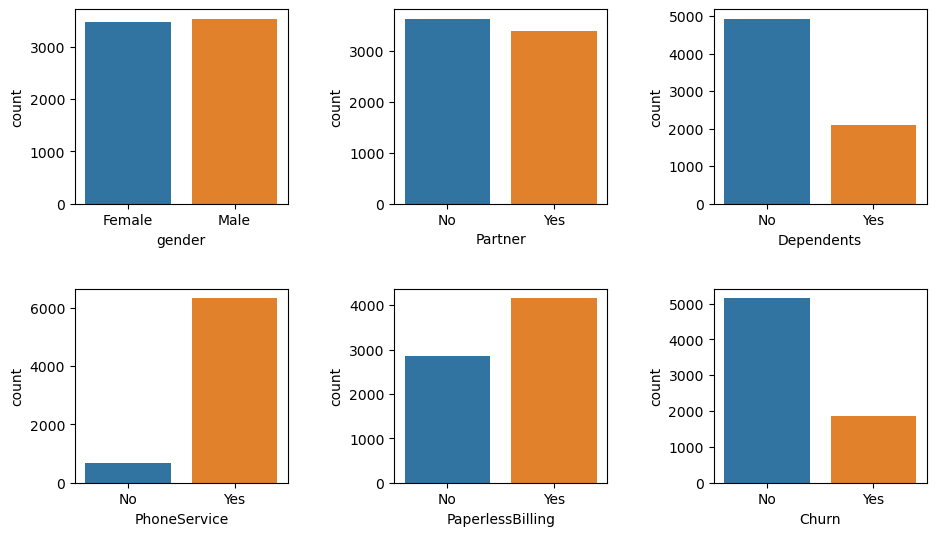

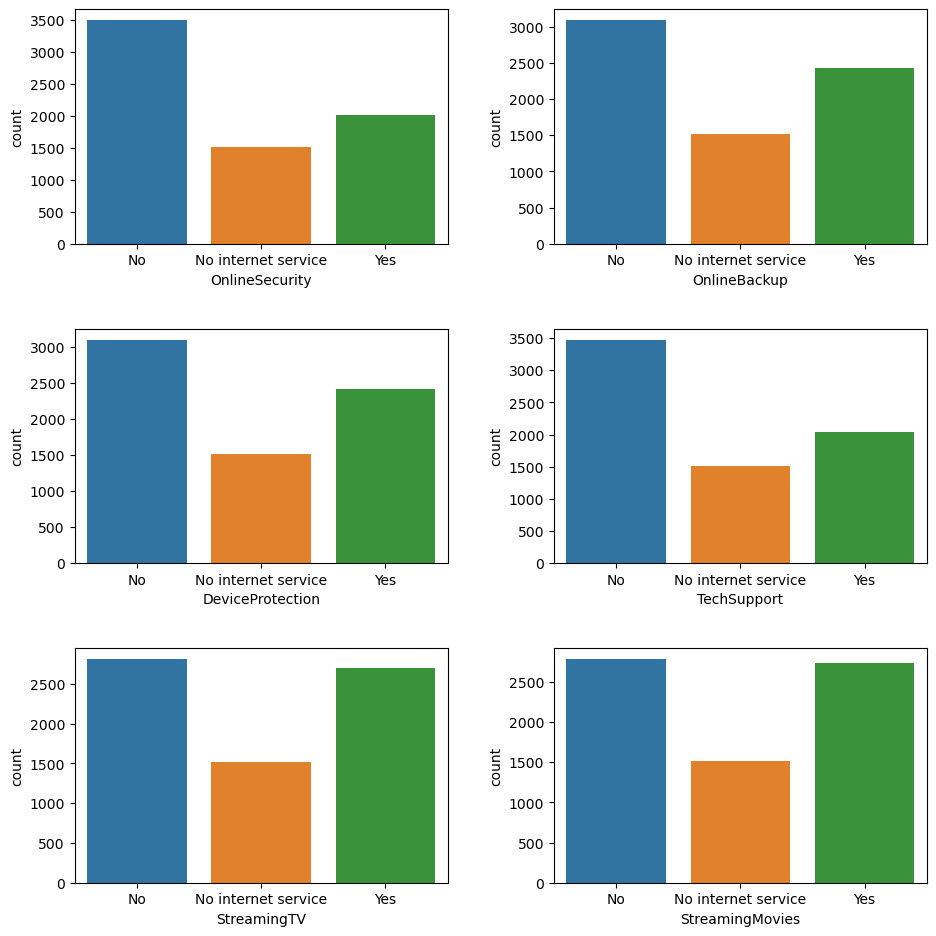

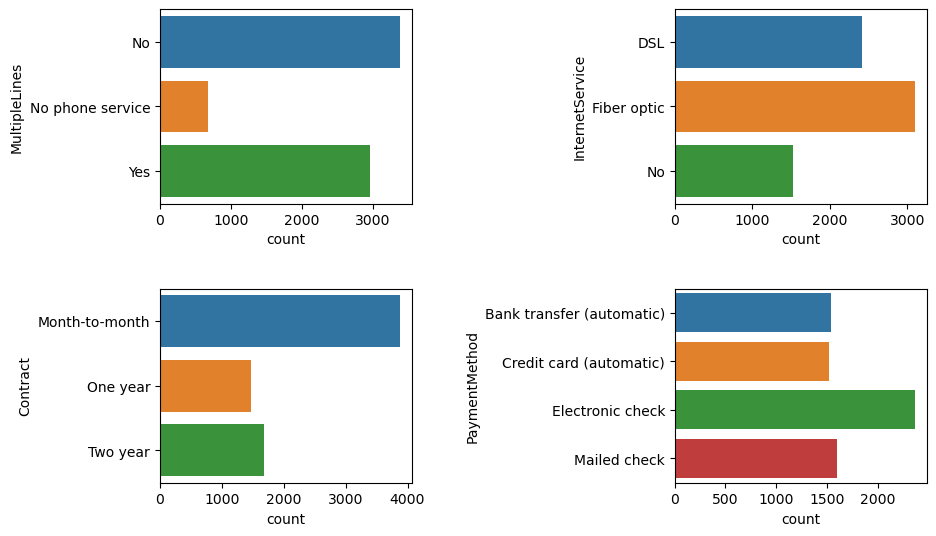

In [23]:
object_columns = df.select_dtypes(include="object").columns
yes_no = object_columns[[0, 1, 2, 3, 13, 15]]
yes_no_service = object_columns[[6, 7, 8, 9, 10, 11]]
others = object_columns[[4, 5, 12, 14]]

plt.figure(figsize=(10, 6))
for i, column in enumerate(yes_no):
    plt.subplot(2, 3, i+1)
    sns.countplot(df.sort_values(by=column), x=column)
plt.tight_layout(pad=3)

plt.figure(figsize=(10, 10))
for i, column in enumerate(yes_no_service):
    plt.subplot(3, 2, i+1)
    sns.countplot(df.sort_values(by=column), x=column)
plt.tight_layout(pad=3)

plt.figure(figsize=(10, 6))
for i, column in enumerate(others):
    plt.subplot(2, 2, i+1)
    sns.countplot(df.sort_values(by=column), y=column)
plt.tight_layout(pad=3)

In [28]:
# cleaned_df = pd.get_dummies(df, drop_first=True, dtype="int8")
# cleaned_df.info()
cleaned_df = df.copy()
cleaned_df["gender"] = cleaned_df["gender"].map({"Male": 1, "Female": 0})
for column in yes_no[1:]:
    cleaned_df[column] = cleaned_df[column].map({"Yes": 1, "No": 0})

In [34]:
len(object_columns)

16

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder



enc = OneHotEncoder(drop="first")
enc.fit_transform(df[object_columns])

<7032x27 sparse matrix of type '<class 'numpy.float64'>'
	with 61792 stored elements in Compressed Sparse Row format>

## Matrix of features and labels

In [18]:
X = cleaned_df.iloc[:, :-1].values
y = cleaned_df.iloc[:, -1].values

print(f"X {X.shape}")
print(f"y {y.shape}")

X (7032, 30)
y (7032,)


## Splitting the dataset to train and test

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

X_train (5625, 30)
X_test (1407, 30)
y_train (5625,)
y_test (1407,)


## Training the Logistic Regression model

In [20]:
from sklearn.linear_model import LogisticRegression

rf = LogisticRegression(max_iter=400)
rf.fit(X_train, y_train)

LogisticRegression(max_iter=400)

## Predicting the test set

In [21]:
y_pred = rf.predict(X_test)
result = pd.DataFrame({"Actual": y_test, "Predict" : y_pred})
result.head(10)

,Actual,Predict
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,1
8,0,0
9,0,0


## Evaluating the model


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.55       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.79      0.78      1407



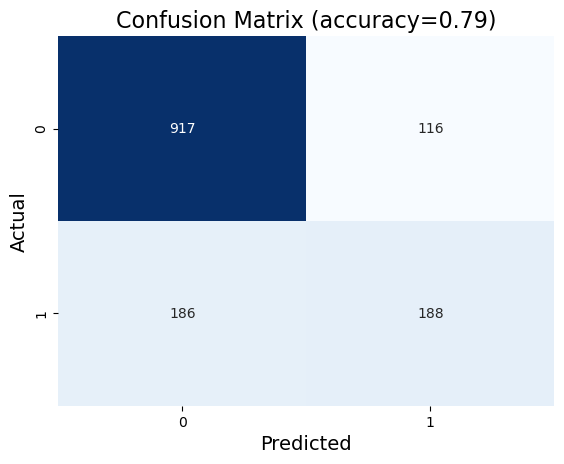

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False, fmt="d")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title(f"Confusion Matrix (accuracy={accuracy:.2f})", fontsize=16);